### Importamos Variables

In [35]:
import simpy 
import random 
import numpy as np

### Inicializamos variables

In [36]:
TIEMPO_POST_VACUNA = 20
MESAS = 5
CONTROL_SIGNOS = 1
SEMANAS = 2
TIEMPO_VACUNACION = 5
TIEMPO_SIMULACION = SEMANAS * 3 * 9 * 60 

### Metodos para la Simulacion

In [38]:
class Vacunacion():
    def __init__(self, env, nombre, recinto):
        self.env = env
        self.nombre = nombre
        self.complicacion = False
        self.control = False
        self.personas_vacunadas = 0
        self.personas = 0
        self.proceso = env.process(self.proceso_vacunar(recinto))
        env.process(self.complicacion_persona())
        
    def control_signos(self):
        yield self.env.timeout(random.randint(CONTROL_SIGNOS, CONTROL_SIGNOS+2))
    
    def logs_procesos(self,icon,nombre, accion, hora):
        print(" %s =====nombre: [%s] accion:  [%s] hora:  [%d] "%(icon,nombre, accion, hora))
    
    def aplicar_vacuna(self):
        yield self.env.timeout(random.randint(TIEMPO_VACUNACION, TIEMPO_VACUNACION+5))
        
    def post_vacuna(self, tiempo):
        yield self.env.timeout(tiempo)
        
    
    def proceso_vacunar(self, recinto):
        while True:
            try:
                nombre= 'persona '+str(cont[0])
                cont[0]=cont[0]+1
                personas_total.append(nombre)
                self.logs_procesos("#####",nombre," Llega al recinto",self.env.now)
                yield env.process(self.control_signos())
                if random.randint(1,100) > 10:
                    self.logs_procesos("", nombre, "Pasa el control", env.now)
                    inicio_vacunacion =  self.env.now
                    yield env.process(self.aplicar_vacuna())
                    tiempo_vacunacion[nombre] = self.env.now - inicio_vacunacion
                    self.logs_procesos("", nombre, "Fue vacunada ", self.env.now)
                
                    tiempo_post_vacuna = TIEMPO_POST_VACUNA
                    inicio = self.env.now
                    self.control = True
                    yield env.process(self.post_vacuna(tiempo_post_vacuna))
                    tiempo_post_vacuna = 0
                    self.logs_procesos("", nombre, "El paciente no presenta complicaciones", self.env.now)
                    self.personas_vacunadas += 1
                else:
                    self.logs_procesos("", nombre,"No pasa el control", self.env.now)
            except simpy.Interrupt:
                self.complicacion = True
                self.logs_procesos("", nombre,"El paciente presenta complicaciones", self.env.now)
                tiempo_post_vacuna -= self.env.now - inicio
                personas_complicaciones.append(nombre)
                with recinto.request(priority=1) as requerimiento:
                    yield requerimiento
                    env.process(self.proceso_traslado(nombre))
                        
                self.complicacion = False
    
    def complicacion_persona(self):
        while True:
            yield self.env.timeout(25)
            if random.randint(1,100) <=5:
                if not self.complicacion:
                    self.proceso.interrupt()
    
    def proceso_traslado(self, nombre):
        self.logs_procesos(' ', nombre,' Es trasladado en ambulancia ',self.env.now)
        
        yield self.env.timeout(random.randint(5,15)) # tiempo traslado en ambulancia 
        self.logs_procesos('', nombre,' El paciente es atendido', self.env.now)
        yield self.env.timeout(random.randint(300,1200)) # tiempo en ser atendido 5-24 horas 
        
        if random.randint(1,100) <=10:
            self.logs_procesos('',nombre,' El paciente ha fallecido', self.env.now)
            personas_muertas.append(nombre)
        else:
            yield self.env.timeout(random.randint(60,120)) # tiempo en dar alta 1-2 horas
            self.logs_procesos('<---', nombre,'El paciente recibe el alta', self.env.now)
            personas_altas.append(nombre)

### Realizamos el porceso de Simulacion

In [39]:
env = simpy.Environment()
recinto = simpy.PreemptiveResource(env, capacity=1)
vacunacion = [Vacunacion(env,"Mesa %d"% i, recinto) for i in range(MESAS)]
env.run(until=TIEMPO_SIMULACION)
print("Simulacion realizada despues de %d semanas"%SEMANAS)
for i in vacunacion:
    print("La [%s] ha vacunado a [%d] personas"%(i.nombre,i.personas_vacunadas))

 ##### nombre: [persona 1] accion:  [ Llega al recinto] hora:  [0] 
 ##### nombre: [persona 2] accion:  [ Llega al recinto] hora:  [0] 
 ##### nombre: [persona 3] accion:  [ Llega al recinto] hora:  [0] 
 ##### nombre: [persona 4] accion:  [ Llega al recinto] hora:  [0] 
 ##### nombre: [persona 5] accion:  [ Llega al recinto] hora:  [0] 
  nombre: [persona 4] accion:  [Pasa el control] hora:  [1] 
  nombre: [persona 5] accion:  [Pasa el control] hora:  [1] 
  nombre: [persona 1] accion:  [Pasa el control] hora:  [3] 
  nombre: [persona 2] accion:  [Pasa el control] hora:  [3] 
  nombre: [persona 3] accion:  [No pasa el control] hora:  [3] 
 ##### nombre: [persona 6] accion:  [ Llega al recinto] hora:  [3] 
  nombre: [persona 6] accion:  [Pasa el control] hora:  [6] 
  nombre: [persona 5] accion:  [Fue vacunada ] hora:  [10] 
  nombre: [persona 4] accion:  [Fue vacunada ] hora:  [11] 
  nombre: [persona 6] accion:  [Fue vacunada ] hora:  [11] 
  nombre: [persona 1] accion:  [Fue vacunad

 ##### nombre: [persona 403] accion:  [ Llega al recinto] hora:  [2097] 
  nombre: [persona 402] accion:  [Fue vacunada ] hora:  [2098] 
  nombre: [persona 403] accion:  [Pasa el control] hora:  [2099] 
  nombre: [persona 400] accion:  [El paciente presenta complicaciones] hora:  [2100] 
 ##### nombre: [persona 404] accion:  [ Llega al recinto] hora:  [2100] 
   nombre: [persona 400] accion:  [ Es trasladado en ambulancia ] hora:  [2100] 
  nombre: [persona 404] accion:  [Pasa el control] hora:  [2102] 
  nombre: [persona 403] accion:  [Fue vacunada ] hora:  [2104] 
  nombre: [persona 404] accion:  [Fue vacunada ] hora:  [2109] 
  nombre: [persona 399] accion:  [El paciente no presenta complicaciones] hora:  [2112] 
 ##### nombre: [persona 405] accion:  [ Llega al recinto] hora:  [2112] 
  nombre: [persona 400] accion:  [ El paciente es atendido] hora:  [2115] 
  nombre: [persona 405] accion:  [Pasa el control] hora:  [2115] 
  nombre: [persona 401] accion:  [El paciente no presenta co

### Resultados del proceso

In [44]:
complicaciones1 =len(personas_complicaciones)
muertes1 =len(personas_muertas)
altas1 =len(personas_altas)
total=len(personas_total)
print("Se vacunaron un total de: ",total)
print("Las personas que presentaron complicaiones fueron: ",complicaciones1)
print("Las personas que resivieron el alta medica fueron: ",altas1)
print("Las personas que fallcieron por las complicaiones fueron: ",muertes1)

Se vacunaron un total de:  626
Las personas que presentaron complicaiones fueron:  25
Las personas que resivieron el alta medica fueron:  15
Las personas que fallcieron por las complicaiones fueron:  1


### Graficas de los resultados

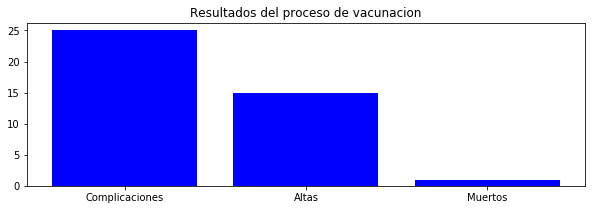

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
resl = [len(personas_complicaciones), len(personas_altas), len(personas_muertas)]
etiquetas = ['Complicaciones','Altas','Muertos']
plt.bar(etiquetas, resl, color=['blue', 'blue', 'blue'])
plt.title('Resultados del proceso de vacunacion')
plt.show()